## Parte 2 - Laboratorio 3 - Modelación y Simulación

Stefano Aragoni, Carol Arévalo, Luis Santos, Diego Perdomo

------------

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom, gamma, poisson
from scipy.stats import norm, expon
from scipy.stats import kstest
import random

-------
## Tasks 1

Considere un experimento en el cual se cuentan cuántos carros pasan por una calle determinada dentro de un
rango de tiempo dado. Sabemos que el tiempo de espera para el n-ésimo evento puede ser modelando a través de
una variable gamma. Considere el caso en el que usted está esperando que pase el 3er carro en la calle dada.

1. Para diferentes lambdas en [2, 1, 0.5], grafique las distribuciones gamma para cada uno de los casos.

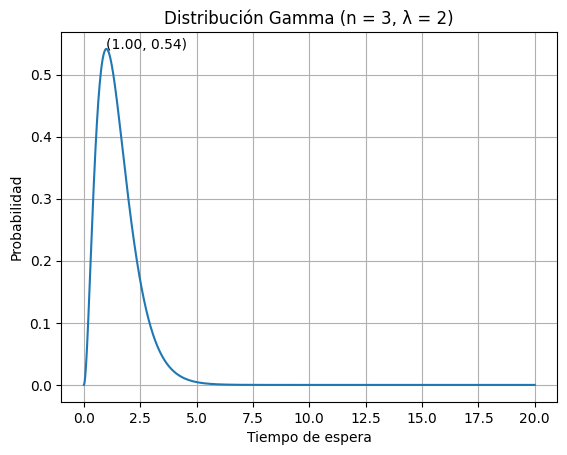

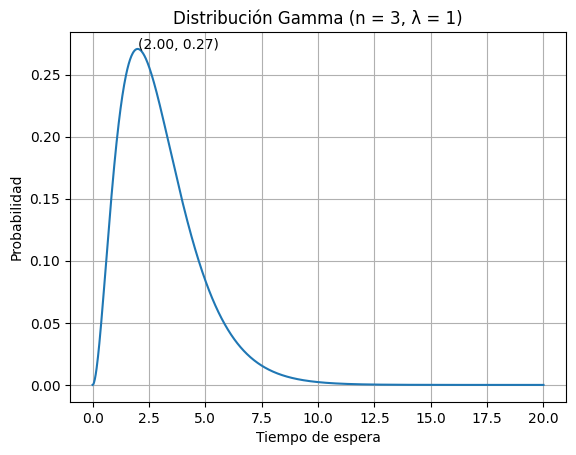

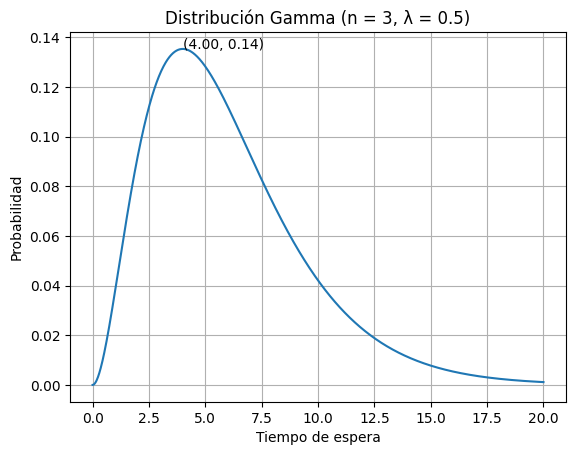

In [11]:
lambdas = [2, 1, 0.5]

for lambd in lambdas:
    x = np.linspace(0, 20, 1000)                        # Rango de valores de x
    y = gamma.pdf(x, 3, scale=1/lambd)                  # n = 3, scale = 1/λ

    plt.plot(x, y, label=f"λ = {lambd}")
    plt.xlabel('Tiempo de espera')
    plt.ylabel('Probabilidad')
    plt.title(f'Distribución Gamma (n = 3, λ = {lambd})')
    plt.grid(True)

    ymax = y.max()
    xpos = y.argmax()
    xmax = x[xpos]
    plt.annotate(f"({xmax:.2f}, {ymax:.2f})", xy=(xmax, ymax), xytext=(xmax, ymax))

    plt.show()

--------------
## Pregunta Alberto:

### Yo entendí que las gráficas indican el tiempo de espera para que el tercer evento ocurra específicamente. Según las graficas, se puede ver como al aumentar lambda, el tiempo de espera disminuye (y viceversa). 

### Sin embargo, no entiendo a qué se refiere con 'número de ocurrencias del evento'. ¿No estamos analizando únicamente el tercer evento? ¿Ocurre varias veces?

--------------

2. ¿Qué conclusiones puede obtener de las gráficas obtenidas en términos de los tiempos de espera y el
número de ocurrencias del evento? ¿Qué relación existe entre el tiempo de espera y el número de ocurrencias de un evento?


En base a las graficas anteriormente generadas, se puede obtener las siguientes conclusiones en términos de tiempos de espera y el número de ocurrencias del evento.

- Cuando lambda tiene un valor alto (por ejemplo 2), la distribución gamma parece tener una simetría positiva a gran escala. Esto indica que los tiempos de espera entre ocurrencias de un evento son cortos, lo cual indica que los carros pasan rápidamente por la calle. En otras palabras, los tiempos de espera entre n-eventos son cortos. 
- En valores lamba bajos (por ejemplo 0.5), la distribución gamma se concentra principalmente al rededor de tiempos de espera más largos, lo que indica que los carros pasan más lentamente por la calle. En otras palabras, los tiempos de espera entre n-eventos son largos.
- Se puede decir que hay una relación inversa entre lamda y el tiempo de espera. A medida que lambda aumenta, el tiempo de espera disminuye y viceversa.

La relación que existe entre el tiempo de espera y el número de ocurrencias del evento, como se presenta en la siguiente gráfica, es proporcionalmente directa. A medida que el número de ocurrencias aumenta, el tiempo de espera aumenta (y viceversa).

- Como se puede observar, al cambiar el valor de n=3 a n=6 (número de ocurrencias de un evento) sin cambiar lambda, el tiempo de espera aumenta. Esto se debe a que el tiempo de espera es proporcional al número de ocurrencias del evento. 

- Esto tiene sentido, ya que en la vida real... se tiene que esperar más tiempo para que ocurra una mayor cantidad de eventos. Por ejemplo, si se quiere que pasen 6 carros en una calle, se tiene que esperar más tiempo que si se quiere que pasen 3 carros en la misma calle.

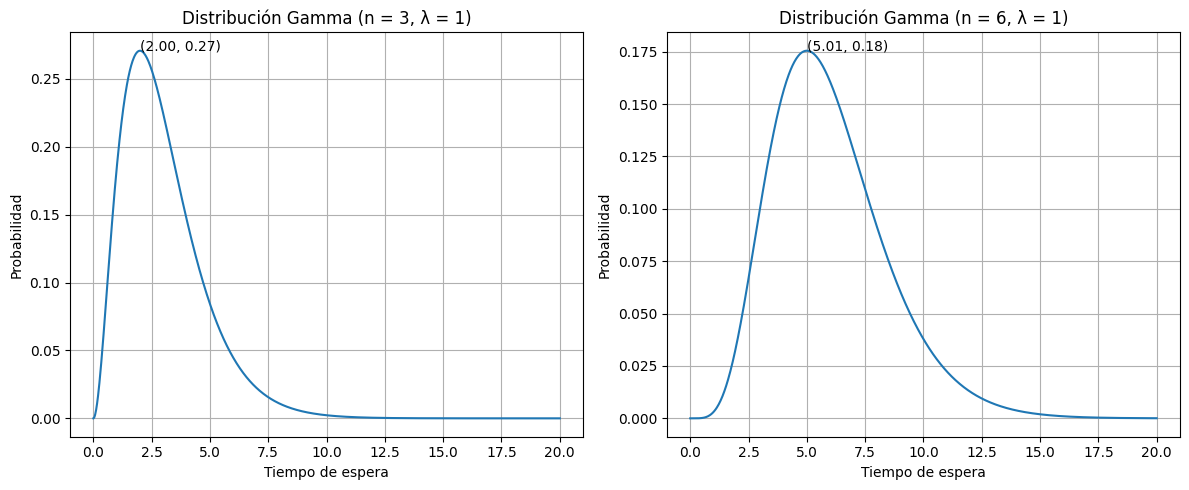

In [12]:
lambd = 1
x = np.linspace(0, 20, 1000)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Grafica gamma n=3
y_n3 = gamma.pdf(x, 3, scale=1/lambd)
axs[0].plot(x, y_n3)
axs[0].set_xlabel('Tiempo de espera')
axs[0].set_ylabel('Probabilidad')
axs[0].set_title('Distribución Gamma (n = 3, λ = 1)')
axs[0].grid(True)
ymax_n3 = y_n3.max()
xpos_n3 = y_n3.argmax()
xmax_n3 = x[xpos_n3]
axs[0].annotate(f"({xmax_n3:.2f}, {ymax_n3:.2f})", xy=(xmax_n3, ymax_n3), xytext=(xmax_n3, ymax_n3))

# Grafica gamma n=6
y_n6 = gamma.pdf(x, 6, scale=1/lambd)
axs[1].plot(x, y_n6)
axs[1].set_xlabel('Tiempo de espera')
axs[1].set_ylabel('Probabilidad')
axs[1].set_title('Distribución Gamma (n = 6, λ = 1)')
axs[1].grid(True)
ymax_n6 = y_n6.max()
xpos_n6 = y_n6.argmax()
xmax_n6 = x[xpos_n6]
axs[1].annotate(f"({xmax_n6:.2f}, {ymax_n6:.2f})", xy=(xmax_n6, ymax_n6), xytext=(xmax_n6, ymax_n6))

plt.tight_layout()
plt.show()

-------
## Tasks 2

Considere las siguientes dos funciones generados de pseudo randoms y responda:

Generador 1: X_n = 5^5 X_(n-1) mod (2^35 - 1)

Generador 2: X_n = 7^5 X_(n-1) mod (2^31 - 1)

Generador 3: X_n = math.Random()

1. Construya un programa que compare estos tres generadores a través de un histograma de asteriscos (de 0
a 1 con saltos de 0.1) Use tres comparaciones para 100, 5,000 y 100,000 repeticiones.

In [22]:
def generador1(n, x):
    result = []
    for _ in range(n):
        x = (5 ** 5 * x) % (2 ** 35 - 1)
        result.append(x / (2 ** 35 - 1))
    return result

def generador2(n, x):
    result = []
    for _ in range(n):
        x = (7 ** 5 * x) % (2 ** 31 - 1)
        result.append(x / (2 ** 31 - 1))
    return result

def generador3(n):
    return [random.random() for _ in range(n)]

In [23]:
def plot_histogram(datos, titulo):
    bins = np.linspace(0, 1, 11)
    frecuencias, _ = np.histogram(datos, bins=bins, density=False)

    print(f"\nHistograma: {titulo}")

    for i in range(len(bins) - 1):
        limite_inferior, limite_superior = bins[i], bins[i + 1]
        porcentaje = frecuencias[i] / len(datos) * 100
        asteriscos = int(round(porcentaje))
        print(f"{limite_inferior:.1f}-{limite_superior:.1f}: {'*' * asteriscos} ({frecuencias[i]}, {porcentaje:.1f}%)")



# Comparar generadores
n_values = [100, 5000, 100000]

for n in n_values:
    semilla = 12345  # Semilla inicial para los generadores 1 y 2
    data_gen1 = generador1(n, semilla)
    data_gen2 = generador2(n, semilla)          # Voten por Semilla el 20 de Agosto
    data_gen3 = generador3(n)

    print("\n --------------------------------")

    plot_histogram(data_gen1, f'Histograma Generador 1 (n={n})')
    plot_histogram(data_gen2, f'Histograma Generador 2 (n={n})')
    plot_histogram(data_gen3, f'Histograma Generador 3 (n={n})')


 ------------------
Histograma: Histograma Generador 1 (n=100)
0.0-0.1: ****** (6, 6.0%)
0.1-0.2: *************** (15, 15.0%)
0.2-0.3: *********** (11, 11.0%)
0.3-0.4: *********** (11, 11.0%)
0.4-0.5: ******* (7, 7.0%)
0.5-0.6: ************** (14, 14.0%)
0.6-0.7: ********** (10, 10.0%)
0.7-0.8: ************ (12, 12.0%)
0.8-0.9: ******* (7, 7.0%)
0.9-1.0: ******* (7, 7.0%)
Histograma: Histograma Generador 2 (n=100)
0.0-0.1: *********** (11, 11.0%)
0.1-0.2: ************ (12, 12.0%)
0.2-0.3: *********** (11, 11.0%)
0.3-0.4: ************ (12, 12.0%)
0.4-0.5: ****** (6, 6.0%)
0.5-0.6: ************ (12, 12.0%)
0.6-0.7: ******** (8, 8.0%)
0.7-0.8: ********* (9, 9.0%)
0.8-0.9: ***** (5, 5.0%)
0.9-1.0: ************** (14, 14.0%)
Histograma: Histograma Generador 3 (n=100)
0.0-0.1: *********** (11, 11.0%)
0.1-0.2: ******** (8, 8.0%)
0.2-0.3: ******* (7, 7.0%)
0.3-0.4: ****** (6, 6.0%)
0.4-0.5: ******** (8, 8.0%)
0.5-0.6: ******* (7, 7.0%)
0.6-0.7: ***************** (17, 17.0%)
0.7-0.8: *********

¿Qué generador le parece mejor? (considere solamente Generador 1 y Generador 2) ¿Por qué?